<h1 align= 'center'> Conceptos de Teoría de la Información</h1>

<h3>Autor</h3>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

<h3>Fork</h3>

<h3>Referencias</h3>

1. Christofer. M. Bishop, *Pattern Recognition and machine Learning*, first edition,Springer, 2006
2. Solomon Kullback, *Information Theory and Statistics*, Dover Publications, Inc, 1968
3. Robert B.  Ash, *Information Theory*, Dover Publications, Inc, 1990.
4. James V Stone, [Information Theory: A Tutorial Introduction](https://arxiv.org/pdf/1802.05968.pdf)


<h2> 1.  Contenido o cantidad de Información</h2>

La idea básica de la teoría de la información es que el **valor de la noticia** de un mensaje comunicado depende del grado en que el *contenido del mensaje sea sorprendente*. 


Si un evento es muy probable, no es sorprendente (y generalmente poco interesante) cuando ese evento ocurre como se esperaba. Sin embargo, si es improbable que ocurra un evento, es mucho más informativo saber que el evento ocurrió o sucederá.

En teoría de la información, **el contenido de información, autoinformación o la sorpresa** de una variable o una señal aleatoria *es la cantidad de información obtenida cuando se muestrea la correspondiente distribución*. 

Formalmente, el contenido de información es una variable aleatoria definida para cualquier evento en la teoría de probabilidad, independientemente de si una variable aleatoria se está midiendo o no.

El contenido de la información se expresa en una unidad de información, como se explica a continuación. El valor esperado de la autoinformación es la **entropía** teórica de la información, la cantidad promedio de información que un observador esperaría obtener sobre un sistema al muestrear la variable aleatoria.


<h3> 1.1 Enfoque matemático </h3>

Supongamos que $ X $ es una variable aleatoria discreta con valores $ \Omega = \{x_1, x_2, \cdots \} $ y probabilidades $ \mathcal {P} = \{p_i = P (X = x_i), \quad i = 1, 2, \cdots \} $. Si $ x \in \Omega $, el contenido de información (o sorpresa) del conjunto (evento) $ \{x\} $ viene dado por:



$$
I(\{x\})=-\log_k{P(X=x)} = \log_k \left[ \frac{1}{P(X=x)}\right]
$$

Donde $k$ es una base que depende principalmente de la cardinalidad de $ \Omega $.

<h4> Ejemplo 1: Distribcuón de Bernoulli</h4>

Supongamos que $ X \sim Bernoulli(p)$, por lo tanto: $ x \in \{0,1 \} $. Podemose observar el comportamiento de la sorpresa al variar el parámetro de distribución de la siguiente manera:

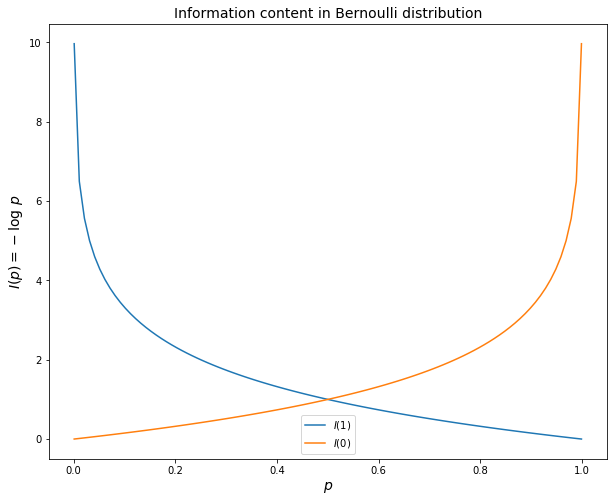

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig=plt.figure(figsize=(10, 8))

plt.title('Information content in Bernoulli distribution',fontsize=14)
p=np.linspace(1e-3,1-1e-3,100)
I_1=-np.log2(p)
I_0=-np.log2(1-p)
plt.plot(p,I_1,label=r"$I(1)$")
plt.plot(p,I_0,label=r"$I(0)$")
plt.xlabel("$p$", fontsize = 14)
plt.ylabel("$I(p) = -\log \ p$", fontsize = 14)
plt.legend()
plt.show()

<h4> Ejemplo 2: Distribuciones Continuas </h4>

Para una distribución continua general con densidad $ f(x) $, el contenido de información (sorpresa) en un punto $ x $ en el soporte de la distribución está dado por $ -\log f(x) $. La siguiente imagen muestra el contenido de información de tres distribuciones continuas unidimensionales: 

- la distribución normal estándar, 
- la distribución t-Student con 10 grados de libertad (df = 10), y 
- la distribución doble exponencial (Laplace).
 

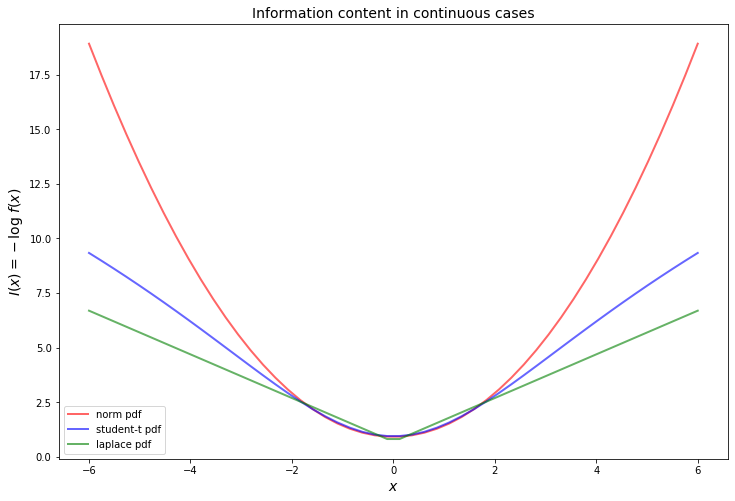

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import laplace
#
fig, ax = plt.subplots(1, 1,figsize=(12, 8))
plt.title('Information content in continuous cases',fontsize=14)

x = np.linspace(-6,6)
#
y_norm = -np.log(norm.pdf(x))
ax.plot(x, y_norm, 'r-', lw=2, alpha=0.6, label='norm pdf')
#
y_student_t = -np.log(t.pdf(x, df=10))
ax.plot(x, y_student_t, 'b-', lw=2, alpha=0.6, label='student-t pdf')
#
y_laplace = -np.log(laplace.pdf(x))
ax.plot(x, y_laplace, 'g-', lw=2, alpha=0.6, label='laplace pdf')
#
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$I(x) = -\log \ f(x)$',fontsize=14)
plt.legend()
plt.show()

Observe  que la distribución normal tiene un mayor contenido de información o un mayor grado de sorpresa para valores $x\ge 3$ que las otras distribuciones. Este hecho tiene un efecto importante en términos de modelado estadístico. En el caso de variables aleatorias con distribución normal estándar, los valores superiores a 3 son sorprendentes y, por lo general, pueden considerarse valores atípicos. Por otro lado, si la variable aleatoria tiene distribución, digamos Student-T, con 4 grados de libertad, esos valores son menos sorprendentes. Por esta razón, la distribución de Student-T se prefiere en los modelos de regresión, para tales casos (regresión robusta).


En general, si $ (S,  \Omega, \mathcal {P}) $ es un espacio de probabilidad y $ E \in \Omega $ es un evento con probabilidad $ \mathcal{P}(E) $, entonces el contenido de información (también llamado sorpresa) de $ E $ es una función creciente del recíproco de la probabilidad $ {\displaystyle \mathcal{P}(E)} $ del evento, precisamente

$$I(E)=-\log_{k}(\mathcal{P}(E))=\log_{k}\left(\frac{1}{\mathcal{P}(E)}\right).$$


<h2> 2 Entropía</h2>

Aunque el contenido de información proporciona información interesante sobre eventos específicos $ x $, en algunos casos nos gustaría conocer el contenido de información de una distribución de probabilidad. En este asunto, lo más razonable sería estimar la información esperada. Esta estimación se conoce como entropía.

<h3> 2.1 Entropía de  Shannon</h3>

Supongamos que $X$ es una variable aleatoria discreta. Le entropía (de Shanon) de la variable aleatoria $X$, o lo que es lo mismo, la entropía de la distribución asociada a $X$ se define por

$$H(X)=\sum_{x\in \Omega} P(X=x)I(x)=-\sum_{x\in \Omega}P(X=x)\log{P(X=x)} = -\sum_{i} p_i\log p_i.$$

<h4> Notas</h4>

1. En ocasiones, la entropía de Shanon para una variable aleatoria $ X $ con probabilidades $ p_1, \ldots, p_M $ se denota $ H (p_1, \ldots, p_M) $. Por ejemplo, la entropía de una distribución de Bernoulli a veces se denota $H(p,q)= H(p,1-p)$.
2. Algunos autores llaman a  $H(X)$ como *incertidumbre*.
3. $H(X)$ Es una esperanza. La entropía es solo la **sorpresa media** de la variable aleatoria $H(X)$.

<h4> Racional</h4>

Para comprender el significado de $ - \sum_i p_i \log p_i $, primero defina una función de información $ I $ en términos de un evento $ i $ con probabilidad $ p_i $. La cantidad de información adquirida debido a la observación del evento $ i $ se deduce de la solución de Shannon de las propiedades fundamentales de la información:


1. $I(p)$  disminuye monotónicamente en $ p $: un aumento en la probabilidad de un evento disminuye la información de un evento observado, y viceversa.
2. $I(p)\ge 0$ : la información es una cantidad no negativa.
3. $I(1) = 0$ : los eventos que siempre ocurren no comunican información.
4. $I(p_1 p_2) = I(p_1) + I(p_2)$ : La información debida a eventos independientes es aditiva.


La última es una propiedad crucial. Establece que la probabilidad conjunta de fuentes de información independientes comunica tanta información como los dos eventos individuales por separado.

- $\leadsto$ La entropía proporciona una medida sobre la información promedio de una distribución. Por ejemplo, en el caso de Bernoulli, la entropía máxima se logra cuando el parámetro es 0.5, es decir, cuando todos los eventos son igualmente probables.

Hay una interpretación importante de la entropía que está relacionada con el número promedio de "contenedores" o shannons (relacionados con la base del logaritmo, en este caso 2) necesarios para representar la información de $ X $. En el caso de Bernoulli, requerimos 1 bin para representar los datos.



<h3> Dos desigualdades de la teoría de información. </h3>

<h4> Lema 1 </h4>

*Supónga que $0\le p \le 1$. Entonces  $-p\log p\ge 0$.*

-$\leadsto$ Esto implica que la entropía de Shanon es siempre positiva.


<h4> Lema 2</h4>

*Sea $p_1,\ldots,p_M$ y  $q_1,\ldots,q_M$ números prositivos arbitrarios tales que $\sum_i p_1 =1$, y $\sum_i q_i=1$. Entoces,
$$
-\sum_{i=1}^M pi\log p_i \le -\sum_{i=1}^M pi\log q_i,
$$
la igualdad se tiene si y solo si $p_i=q_i$ para todo  $i$*.

<h4> Teorema 1</h4>

$$
H(p_1,\ldots,p_M) \le log(M),
$$ 

*la igualdad se tiene si y solo si  para todo $p_i$, se tiene que* $p_i = 1/M$.

Este teorema nos ayuda a entender la entropía de la siguiente manera.

1. Entre las distribuciones discretas con  $ M $ posibles resultados, la distribución uniforme $ U \{x_1, \ldots, x_m \} $ tiene la mayor entropía. Esto se debe a que los resultados de la variable tienen la misma información que contienen (sorpresa).
2. En general, la entropía es mayor para variables aleatorias discretas con mayor número de valores posibles. En particular, la entropía de la distribución uniforme ($ \log M $) es una función creciente de $ M $.



<h4>Ejemplo: entropía de las distribuciones de la familia Bernoulli</h4>

Supongamos que $X\sim Bernoulli(p)$, por lo tanto: $x \in \{0,1\}$, Podemos observar el comportamiento de la entropía al variar el parámetro de distribución en la siguiente gráfica

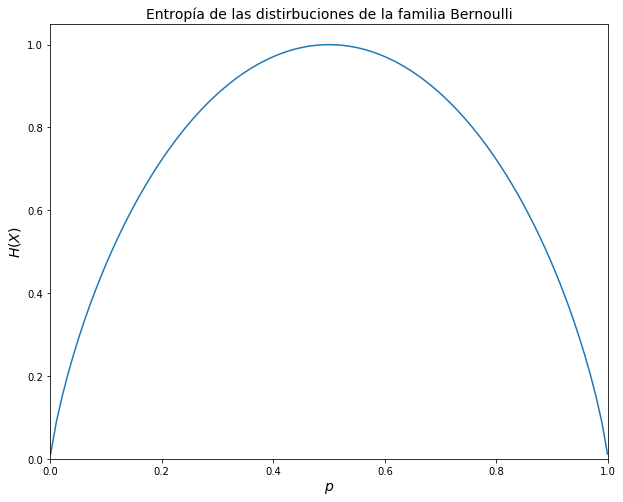

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig=plt.figure(figsize=(10,8))
H_ber=lambda X: -np.sum(X*np.log2(X),axis=1) # Function to estimate the entropy of a bernoulli distribution
p=np.linspace(1e-3,1-1e-3,100)
probs_X=np.vstack([p,1-p]).T
plt.plot(p,H_ber(probs_X))
plt.xlabel("$p$",fontsize =14)
plt.ylabel("$H(X)$",fontsize =14)
plt.ylim([0,1.05])
plt.xlim([0,1])
plt.title('Entropía de las distirbuciones de la familia Bernoulli',fontsize =14)
plt.show()

<h3> Entropía Conjunta</h3>

Sean $X$ y $Y$   variables aleatorias discretas que tienen una función de probabilidad conjunta


$$
p_{ij}=p(x_i,y_j) = p\{X=x_i,Y=y_j \}; i=1\ldots,M; j=1,\ldots,L.
$$

Es natural definir la entropía conjunta de $ X $ y $ Y $ como

$$
H(X,Y) = - \sum_{i=1}^M \sum_{j=1}^L p(x_i,y_j) \log p(x_i,y_j).
$$

<h4> Teorema 2</h4>

$$
H(X,Y) \le H(X) + H(Y),
$$

*la igualdad se tiene si y solo si  $X$ y $Y$ son idependientes*.


<h3> Entropía Condicional</h3>

Supongamos que $ X $ y $ Y $ sean variables aleatorias discretas con distribución conjunta $ p (x_i, y_j) $. Si se sabe que $ X = x_i $, la distribución de $ Y $ se caracteriza por el conjunto de probabilidades condicionales $ p (y_j | x_i) $. Por lo tanto definimos la entropía condicional de $ Y $ dado $ X = x_i $ como

$$
H(Y|X=x_i) = -\sum_{j=1}^L p(y_j|x_i) \log p(y_j|x_i).
$$

La entropía condicional de $ Y $ dado $ X $ es el promedio ponderado promedio de $ H (Y | X = x_i) $, es decir



$$
H(Y|X) = - \sum_{i=1}^M \sum_{j=1}^L p(x_i,y_j) \log p(y_j|x_i).
$$

<h4> Teorema 3</h4>

$$
H(X,Y) = H(X) + H(Y|X) = H(Y) + H(X|Y).
$$

<h4> Teorema 4</h4>

$$
H(Y|X) \le H(Y,X),
$$

*La igualdad se tiene si y solo si $X$ y $Y$ son independientes*.

<h3> Información mutua</h3>

Suponga que $ X $ y $ Y $ son variables aleatorias discretas con funciones de masa de probabilidad dadas por $ f_X $ y $ f_Y $ respectivamente, y una función de masa de probabilidad conjunta $ f $. Así, la información mutua de $ X $ y $ Y $, denotada $ \mathfrak {M} (X, y) $ se define como

$$
\mathfrak{M}(X,Y) = \mathbb{E}_f \ln \frac{f(X,Y)}{f_X(X)f_Y(Y)} = \sum_i \sum_j  f(x_i,y_j)[\ln f(x_i,y_j) - \ln f_X(x_i)f_Y(y_j)].
$$

<h4> Notas </h4>

1. La dependencia mutua es una medida de dependencia entre las variables $ X $ y $ Y $. Tenga en cuenta que si $ X $ y $ Y $ son independientes, su información mutua es cero.
2. Si $ X $ y $ Y $ tienen exactamente la misma distribución, entonces $\mathfrak{M}(X,Y) = H(X)$. 

   
<h2> 2.2 El caso continuo: entropía diferencial </h2>

La entropía de Shannon está restringida a variables aleatorias que toman valores discretos. La fórmula correspondiente para una variable aleatoria continua con función de densidad de probabilidad $ f(x) $ con soporte finito o infinito $ \mathbb{X}$ en la línea real se define por analogía, utilizando la forma anterior de la entropía como una esperanza:

$$h[f]= E [-\ln(f(x))]=-\int_{\mathbb {X}}f(x)\ln(f(x))dx.$$


Esta fórmula generalmente se conoce como entropía continua, o **entropía diferencial**.

Aunque la analogía entre ambas funciones es sugestiva, debe establecerse la siguiente pregunta: 

<center> ¿Es la entropía diferencial una extensión válida de la entropía discreta de Shannon? </center>


La entropía diferencial carece de una serie de propiedades que la entropía discreta de Shannon tiene, por instinto, *incluso puede ser negativa*.

- $ \leadsto $ Se puede demostrar que la entropía diferencial no es un límite de la entropía de Shannon para $ n \to \infty $.
   
Por otro lado, los conceptos y definiciones de la entropía de Shanon se traducen con la misma interpretación al caso continuo. Las sumas ahora son integrales. Así tenemos eso en el caso continuo

1. Entropía conjunta: $H(X,Y) = -\int \int f(x,y)\ln f(x,y) dx dy$.
2. Entropía condicional: $H(Y|X)= -\int\int  f(x,y)\ln p(y|x) dx dy$.
3. Infromación mutua: $\mathfrak{M}(X,Y)  = \int \int f(x,y)[\ln f(x,y) - \ln f_X(x)f_Y(y)]dx dy$.


<h2> 2.3 Distribuciones y restricciones de entropía máximas</h2>

Se puede demostrar que algunas distribuciones maximizan la entropía bajo algunas restricciones. La tabla muestra algunas distribuciones y las restricciones de entropía que maximizan.


<h4> <center>Tabla de algunas distribuciones de probabilidad y restricciones de entropía máximas correspondientes </center></h4>

 |Distribución | Probabilidad / densidad func. | Máx. Restricción de entropía | Soporte de la distribución | Entropía (Diferencial) |
|----|----|----|----|----|
|Uniform (discrete)|$f(k)={\frac {1}{b-a+1}}$|None|$\{a,a+1,\ldots,b-1,b\}$|$\ln n$|
|Uniform (continuous)|$f(x)=\frac {1}{b-a}$|None|$[a,b]$|$\ln(b-a)$|
|Bernoulli|$f(k)=p^{k}q^{1-k}$|$\mathbb{E}(k)=p$|\{0,1\}|$-(p\ln p +q\ln q)$|
|Geometric|$f(k)=(1-p)^{k-1}p$| $\mathbb{E}(k)=\frac{1}{p}$| $\mathbb{N}\setminus\left\{0\right\}=\{1,2,3,\ldots\}$|$\frac{-(q\ln q + p\ln p)}{p}$|
|Exponential|$f(x)=\lambda \exp \left(-\lambda x\right)$|$\mathbb{E}(x)=\frac{1}{\lambda}$|$[0,\infty)$|$1-\ln \lambda$|
|Laplace|$f(x)={\frac {1}{2b}}\exp \left(-{\frac {|x-\mu |}{b}}\right)$|$\mathbb{E}(|x-\mu |)=b$|$(-\infty ,\infty )$|$\ln(2be)$|
|Normal|$f(x)={\frac {\exp \left(-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}\right)}{\sqrt {2\pi \sigma ^{2}}}} $|${E} (x)=\mu ,{E} ((x-\mu )^{2})=\sigma ^{2}$|$(-\infty ,\infty)$|$\ln (2\pi e\sigma^2)$|
|Gamma|$f(x)={\frac {x^{k-1}\exp(-{\frac {x}{\theta }})}{\theta ^{k}\Gamma (k)}}$|${E} (x)=k\theta, {E} (\ln(x))=\psi (k)+\ln(\theta )$|$ [0,\infty )$|$k+\ln \theta + \ln\Gamma(k) + (1-k)\psi(k)$|
|Beta|$f(x)={\frac {x^{\alpha -1}(1-x)^{\beta -1}}{B(\alpha ,\beta )}}$|${E} (\ln(x))=\psi (\alpha )-\psi (\alpha +\beta )$|$[0,1]$|$\ln B(\alpha,\beta) -(\alpha-1) \ln \psi(\alpha) - (\beta-1) \ln \psi(\beta) + (\alpha +\beta-1) \psi(\alpha+\beta)$|$f(k)={n \choose k}p^{k}(1-p)^{n-k}$|


 $\psi$ es la función  poli-gamma; $q=1-p$.



<h2> 3. La divergencia Kullback-Leiber (KL) </h2>

La divergencia de Kullback-Leiber (KL) es una pseudo-distancia que representa la diferencia entre dos distribuciones. Debido a su definición, también se conoce como entropía relativa, porque es el valor esperado de un contenido de información de la relación entre dos distribuciones. Se define la divergencia KL como:

$$
KL(P||Q)=\mathbb{E}_{P}\left(\log{\frac{P(X)}{Q(X)}}\right)
$$

* Caso distreto:

$$
KL(P||Q)=\sum_{i}p(x_i)\log{\frac{p(x_i)}{q(x_i)}} = \sum_{i}p(x_i)[\log [p(x_i)-q(x_i)].
$$

* Caso continuo:

$$
KL(P||Q)=\int_{\Omega}P(X)\log{\frac{P(X)}{Q(X)}} = \int_{\Omega} p(x)\log[p(x)-q(x)]dx.
$$

$\Omega$ es el soporte de las distribuciones 

Onserve que si  $P=Q$ c.s., entonces $KL(P||Q)=0.$

<h2> 4. Entropía cruzada</h2>

Suponga que  $f$ y $g$ son dos funciones de densidad de probabilidad (o masa de probabilidad). La entropía cruzada entre $f$ y $g$ se define como

$$
\mathfrak{D}(f,g) =  -\int f(x) \ln g(x) dx.
$$

En el caso discreto tenemos que

$$
\mathfrak{D}(f,g) =  -\sum_{i} f(x_i) \ln g(x_i).
$$

<h4> Lema 3</h4>

$$
 KL(f||g) = H(f) + \mathfrak{D}(f,g).
$$


Llamamos $ f $ como la distribución de referencia y $ g $ como la distribución aproximada.

- $\leadsto$ Tenga en cuenta que la divergencia KL y la entropía cruzada difieren en $ H (f) $, la entropía de la distribución de referencia. Por otro lado, $ H (f) $ que es constante con respecto a $ g $. Por esta razón, algunos autores llaman KL-divergencia como entropía cruzada.

<h4>  Entropía cruzada como función de pérdida </h4>

En el aprendizaje automático, es común utilizar la entropía cruzada como criterio para evaluar la convergencia de un proceso de aprendizaje (comúnmente un proceso de optimización).

Supongamos que en un problema de clasificación tenemos *T* clases. Ahora suponga que cada uno de los objetos de entrenamiento $ x_i $ pertenece a una clase única, digamos $ C_{it} $. Por lo tanto, una forma común de representar la clase del vector $ x_i $ es mediante el uso de un vector *T*, que tiene todos los elementos iguales a cero, excepto la posición *ti*, que tiene 1. 


En estadística, esta codificación se denomina **codificación dummy**. En el lenguaje de aprendizaje automático se llama **hot one encoding**.


La cuestión clave es que esta codificación representa una distribución del vector de entrenamiento de entrada. Esta es la distribución de referencia para la entrada.

Por otro lado, en cada época (iteración) del entrenamiento de la máquina, la salida es una distribución de propuesta $ s_i $ del vector de entrada. Esta es la distribución aproximada del vector de entrada. Por lo tanto, la entropía cruzada en este caso viene dada por


$$
\mathfrak{D}_i = -\sum_{t=1}^{T} C_{it}\log s_{it}
$$

Si tenemos $ N $ vectores de entrenamiento, la codificación dummy completa es una matriz $ N $ $ \times $ $ T $, digamos $ L $, donde cada celda $ it $ se define como $ l_ {it} = 1 $ es la entrada de entrenamiento $ x_ {i} $ pertenece a la clase $t$, y $ 0 $ de lo contrario.

La función de pérdida de entropía cruzada se debe minimizar en el proceso de entrenamiento es dada

$$
L(X,L) = -\sum_{i=1}^N\sum_{t=1}^T l_{it} \log s_{it}.
$$

$\leadsto$ For example, in a neural network, $s_i =(s_{i1}, \ldots, s_{iT})$ is the output layer, and is produced by the **softmax** function.

<h4> Entropía cruzada y máxima verosimilitud </h4>

Suponga que cada uno de los vectores de entrenamiento de entrada tiene una densidad $ f (x_i, w), i = 1, \ldots, N $, donde $ w $ es el parámetro a aprender. También suponga que los $ x_i $ son independientes.

En la estimación de máxima verosimilitud $ l(w | x) = - \sum_i \log f(x_i; w) $ es la función de pérdida que debe minimizarse. Si suponemos para las observaciones la distribución empírica (la distribución natural de datos), entonces cada observación tiene una probabilidad $ p_i = p (x_i) = 1 / N $. Esta es la distribución de referencia en el problema. La función de pérdida de entropía en este caso viene dada por


$$
L(x|w) = -\frac{1}{N} \sum_i^N \log f(x_i|w).
$$

En consecuencia, la estimación ML minimiza la entropía cruzada entre la distribución empírica de los datos y la distribución aproximada. $f(x|w) = \prod_{i=1}^N f(x_i|w)$.

<h4> Entropía cruzada y estimación modal bayesiana </h4>

Si $ p (w) $ es una función de densidad a priori para $ w $, entonces la densidad posterior viene dada por $ f (x | w) = Kp (w) \prod_ {i = 1} ^ N f (x_i | w ) $, donde e $ K $ es la constante de normalización de la distribución.

Por lo tanto, la estimación modal de $ w $ minimiza la pérdida de entropía cruzada dada por

$$
L(w|x) = -\frac{1}{N}\left[ \sum_i^N \log f(x_i|w) + log p(w)\right].
$$

<h4> Un ejemplo simple de aplicación con redes neuronales </h4>

El siguiente código muestra la implementación de un red neronal simple de dos capas que se usará para el entrenamiento de un clasificador dicotómico. Revise la función de pérdida definda. en este ejemplo simple, el número de datos de entrenamiento es muy pequeño y fijo, por lo que no es necesario el factor $1/N$. Observe que la función de pérdida es exáctamente menos la log verosimilitud de un modelo de Bernoulli.

In [37]:
# define the output activation
import numpy as np

def sigmoid(x):
    return 1.0/(1+np.exp(-x))

# define the net
def net(params, x):
    w1, b1, w2, b2 = params
    hidden = np.tanh(np.dot(w1,x) + b1)
    return (sigmoid(np.dot(w2,hidden) + b2))

# cross entropy loss function
def loss(params, x,y):
    out = net(params,x)
    cross_entropy =  -y * np.log(out) - (1-y)*np.log(1-out) # this is -log likelihood
    return cross_entropy
